<a href="https://colab.research.google.com/github/NoerNikmat/k-means_clustering_model/blob/main/k_means_clustering_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MODELING TORONTO BIKESHARE DATASET USING K-MEANS CLUSTERING**




## **Description**


---






###**Dataset**
Toronto Bikeshare Data

###**Link Dataset**
Toronto Bikeshare Data on Kaggle

https://www.kaggle.com/jackywang529/toronto-bikeshare-data/download


###**Context**
The Bike Share Toronto Ridership data contains anonymized trip data, including:
Trip start day and time, Trip end day and time, Trip duration, Trip start station, Trip end station, User type

###**Content**
In this dataset, we have the bike sharing information form 2017 and 2018.

### **Atribut Dataset**

*   **trip_id**: unique identifier for each trip
*   **trip_start_time**: time when the trip started
*   **trip_stop_time**: time when the trip ended
*   **trip_duration_seconds**: duration of the trip measured in seconds
*   **from_station_id**: station ID where the trip started
*   **from_station_name**: name of the station where the trip started
*   **to_station_id**: station ID where the trip ended
*   **to_station_name**: name of the station where the trip ended
*   **user_type**: identify if the user has a membership or purchased a pass

### **Acknowledgements**
This dataset is from Toronto Parking Authority, published on https://open.toronto.ca/dataset/bike-share-toronto-ridership-data/. You may find the latest complete dataset from there.

The data is licensed under: [Open Government License - Toronto](https://open.toronto.ca/open-data-license/)









##**References**


---




Based on Module 


It might seem to be intuitive that
bikeshare users would travel in the
reverse direction in the evening than in
the morning.


But how true is that? If that's the case,
would it reduce the value of convenience
of bikeshares being available everywhere,
and should they just get their own bikes?
Do we also need a crew to pick up and
restore all the bikes to initial distributions
across the city before the next morning?



1.   Find out what percentage of bikes are returned to its initial location?
2.   How many bikeshare trips usually visit more than just start/end points, but visited some other points before the end of the day?

References for code programming/articles
- Articles [Memahami K-Mean Clustering Pada Machine Learning Dengan Phyton](https://medium.com/@16611129/memahami-k-mean-clustering-pada-machine-learning-dengan-phyton-430323d80868)

- [Exploring Toronto Bike Share Ridership using Python](https://towardsdatascience.com/exploring-toronto-bike-share-ridership-using-python-3dc87d35cb62)

- [Bike availability in the station](https://www.kaggle.com/iwanmanurung/bike-availability-in-the-station)

- [See the flow of bikes](https://www.kaggle.com/yclaudel/see-the-flow-of-bikes)




## **Objectives**

The purpose of this notebook 

1.   Find out Top 10 Stations with the highest number of two-way traveller using EDA?
2.   How to predict the flow of bikes. Are bikes returned to its initial location? Or are there flows of bike from one region to another?



## **Programming With Python**


---




### **Import Dataset**





Install Kaggle for upload dataset into google colab

In [1]:
!pip install -q kaggle

Upload Kaggle API key

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"noer001","key":"5c61dd059665969d566be961b002599c"}'}

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Download dataset from Kaggle

In [4]:
! kaggle datasets download -d 'jackywang529/toronto-bikeshare-data/download'  

 70% 41.0M/58.4M [00:00<00:00, 42.2MB/s]
100% 58.4M/58.4M [00:00<00:00, 85.1MB/s]


In [5]:
!ls

kaggle.json  sample_data  toronto-bikeshare-data.zip


In [6]:
!unzip -q toronto-bikeshare-data.zip

In [7]:
!ls

bikeshare2018		  kaggle.json  toronto-bikeshare-data.zip
bikeshare-ridership-2017  sample_data


Focusing Data on bikeshare2018

In [8]:
!ls bikeshare2018	

bikeshare2018


In [9]:
!ls bikeshare2018/bikeshare2018

'Bike Share Toronto Ridership_Q1 2018.csv'
'Bike Share Toronto Ridership_Q2 2018.csv'
'Bike Share Toronto Ridership_Q3 2018.csv'
'Bike Share Toronto Ridership_Q4 2018.csv'


### **Import Libraries**




In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import requests
import json
import time
import networkx as nx
from sklearn.cluster import KMeans

### **Define Dataset**




In [11]:
Q1 = pd.read_csv('bikeshare2018/bikeshare2018/Bike Share Toronto Ridership_Q1 2018.csv')
Q2 = pd.read_csv('bikeshare2018/bikeshare2018/Bike Share Toronto Ridership_Q2 2018.csv')
Q3 = pd.read_csv('bikeshare2018/bikeshare2018/Bike Share Toronto Ridership_Q3 2018.csv')
Q4 = pd.read_csv('bikeshare2018/bikeshare2018/Bike Share Toronto Ridership_Q4 2018.csv')

In [12]:
Q1.head(2)

trip_id  trip_duration_seconds  ...               to_station_name      user_type
0  2383648                    393  ...  Bathurst St / Fort York Blvd  Annual Member
1  2383649                    625  ...    Central Tech  (Harbord St)  Annual Member

[2 rows x 9 columns]

In [13]:
Q2.tail(2)

trip_id  ...      user_type
558368  3244391  ...  Annual Member
558369  3244395  ...  Annual Member

[2 rows x 9 columns]

In [14]:
Q3.head(2)

trip_id  ...      user_type
0  3244396  ...  Annual Member
1  3244398  ...  Annual Member

[2 rows x 9 columns]

In [15]:
Q4.sample(2)

trip_id  ...      user_type
317571  4526967  ...  Annual Member
63475   4230578  ...  Annual Member

[2 rows x 9 columns]

In [16]:
bikeshare2018="/content/bikeshare2018/"
data2018=[bikeshare2018+"bikeshare2018/Bike Share Toronto Ridership_Q1 2018.csv",
bikeshare2018+"bikeshare2018/Bike Share Toronto Ridership_Q2 2018.csv",
bikeshare2018+"bikeshare2018/Bike Share Toronto Ridership_Q3 2018.csv",
bikeshare2018+"bikeshare2018/Bike Share Toronto Ridership_Q4 2018.csv"]

**Parse the date from the column 'trip_start_time'**

Load the data

In [17]:
first=True

for f in data2018:
    start_time = time.time()
    data = pd.read_csv(f,parse_dates = ['trip_start_time'],dayfirst=True)
    if first:
        bikeshare=data
        first=False
    else:
        bikeshare=bikeshare.append(data,sort=True)
    print("file {} -- {} seconds --".format(f,time.time() - start_time))        
del data , first

file /content/bikeshare2018/bikeshare2018/Bike Share Toronto Ridership_Q1 2018.csv -- 15.906771183013916 seconds --
file /content/bikeshare2018/bikeshare2018/Bike Share Toronto Ridership_Q2 2018.csv -- 9.446226119995117 seconds --
file /content/bikeshare2018/bikeshare2018/Bike Share Toronto Ridership_Q3 2018.csv -- 11.020386457443237 seconds --
file /content/bikeshare2018/bikeshare2018/Bike Share Toronto Ridership_Q4 2018.csv -- 8.894715070724487 seconds --


Hour of the day

In [18]:
bikeshare['hour'] = bikeshare['trip_start_time'].dt.hour

Day of the week

In [19]:
bikeshare['dayofweek'] = bikeshare['trip_start_time'].dt.dayofweek

Date

In [20]:
bikeshare['date'] = bikeshare['trip_start_time'].dt.floor('d')

2 stations in the dataset are not in the list of available stations, so map to the closest

In [21]:
bikeshare.loc[bikeshare['to_station_id']==7068,'to_station_id']=7399
bikeshare.loc[bikeshare['to_station_id']==7219,'to_station_id']=7148
bikeshare.loc[bikeshare['from_station_id']==7068,'from_station_id']=7399
bikeshare.loc[bikeshare['from_station_id']==7219,'from_station_id']=7148

In [22]:
bikeshare

from_station_id  ...       date
0                  7018  ... 2018-01-01
1                  7184  ... 2018-01-01
2                  7235  ... 2018-01-01
3                  7202  ... 2018-01-01
4                  7004  ... 2018-01-01
...                 ...  ...        ...
363485             7088  ... 2018-12-31
363486             7030  ... 2018-12-31
363487             7020  ... 2018-12-31
363488             7014  ... 2018-12-31
363489             7299  ... 2018-12-31

[1922955 rows x 12 columns]

### Exploratory Data Analyst

The stations information from [Station Information ](https://tor.publicbikesystem.net)

In [23]:
r = requests.get('https://tor.publicbikesystem.net/ube/gbfs/v1/en/station_information')

bstations = pd.DataFrame(json.loads(r.content)['data']['stations'])[['station_id', 'name', 'lat', 'lon']].astype({
    'station_id': 'float64',})

#import to csv files
#bstations.to_csv('./bikeshare_stations.csv', index=False)

In [24]:
bstations.sample(2)

station_id  ...        lon
334      7364.0  ... -79.281455
182      7193.0  ... -79.427500

[2 rows x 4 columns]

In [25]:
# cleaning the dataset
bikeshare = bikeshare.dropna(subset=['from_station_name','to_station_name'])
from_to = bikeshare.copy()

In [26]:
from_to.sample(2)

from_station_id                from_station_name  ...  dayofweek       date
421813             7043  Queens Quay W / Lower Simcoe St  ...          3 2018-06-14
650442             7026           Bay St / St. Joseph St  ...          4 2018-11-09

[2 rows x 12 columns]

In [27]:
#stations_trip = list(set(list(from_to.from_station_name.values) + list(from_to.to_station_name.values)))
dates = from_to.index.unique().values

In [28]:
route_trip = from_to.copy()
route_trip = route_trip[['from_station_name', 'to_station_name']]

In [29]:
twoway_trip = route_trip.copy()
twoway_trip = twoway_trip[twoway_trip.from_station_name == twoway_trip.to_station_name]
oneway_trip = route_trip.copy()
oneway_trip = oneway_trip[oneway_trip.from_station_name != oneway_trip.to_station_name]

In [30]:
twoway_map_trip = twoway_trip.groupby('from_station_name').count().sort_values(by='to_station_name', ascending=False)
print('10 Stations with the highest number of two-way traveller')
twoway_map_trip[:10]

10 Stations with the highest number of two-way traveller


to_station_name
from_station_name                                         
Bay St / Queens Quay W (Ferry Terminal)               3515
Humber Bay Shores Park West                           2162
York St / Queens Quay W                               1969
Ontario Place Blvd / Lakeshore Blvd W                 1746
Tommy Thompson Park (Leslie Street Spit)              1742
HTO Park (Queens Quay W)                              1606
Lakeshore Blvd W / Ellis Ave                          1562
Lakeshore Blvd W / Windermere Ave                     1238
Lakeshore Blvd W / Ontario Dr                         1201
Dockside Dr / Queens Quay E (Sugar Beach)             1028

### **Clustering Model**



---



**KMeans on gps coordinates (nbr_cluster = 20)**

(Clustering of the stations in 20 regions)

In [31]:
X = bstations[['lon', 'lat']].values
n_clusters_ = 20
kmeans = KMeans(n_clusters = n_clusters_, init ='k-means++')
kmeans.fit(X) # Compute k-means clustering.
labels = kmeans.fit_predict(X)

**Mapping Station**

In [32]:
# Coordinates of cluster centers.
centers = kmeans.cluster_centers_ 
print((centers))

[[-79.41922056  43.64178498]
 [-79.35426904  43.68883826]
 [-79.44271147  43.65117776]
 [-79.29402347  43.68240243]
 [-79.38120997  43.64967517]
 [-79.1285121   43.78229483]
 [-79.47538547  43.77235223]
 [-79.33977795  43.66619297]
 [-79.48738083  43.62026999]
 [-79.38458992  43.66761653]
 [-79.47112402  43.65485979]
 [-79.43633167  43.6781358 ]
 [-79.39482087  43.70542956]
 [-79.31800537  43.68231259]
 [-79.1915036   43.76509291]
 [-79.36301912  43.6536772 ]
 [-79.41140244  43.66948458]
 [-79.52984308  43.59432018]
 [-79.50794507  43.67659938]
 [-79.39811574  43.64736412]]


In [33]:
# map each station with its region
bstations['clusters']=labels
bstations.index=bstations['station_id']
cluster_map = bstations['clusters'].to_dict()
bikeshare['from_station_c']=bikeshare['from_station_id'].map(cluster_map)
bikeshare['to_station_c']=bikeshare['to_station_id'].map(cluster_map)

**Plotting Cluster**

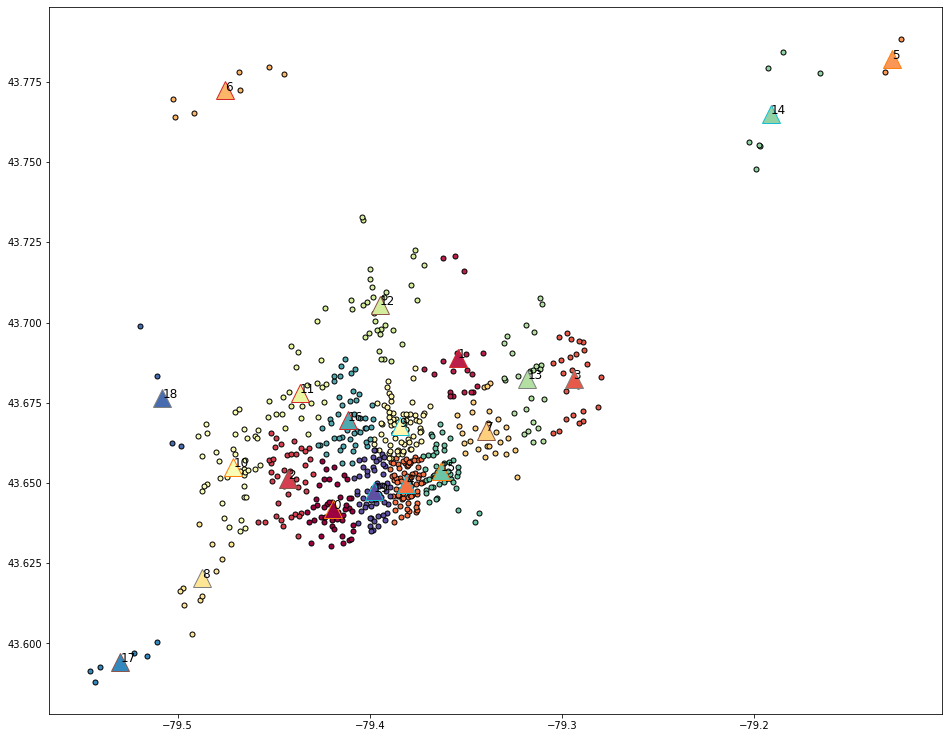

In [34]:
plt.rcParams['figure.figsize'] = [16,13]

unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
BBox = (-79.4900,-79.2700,43.6100,43.7200)
#map_tor = mpimg.imread('map.png')
fig, ax = plt.subplots()
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask]
    ax.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=5)
    ax.plot(centers[k, 0], centers[k, 1], '^',markerfacecolor=tuple(col), markersize=18)
    ax.text(centers[k, 0], centers[k, 1], k,fontsize=12) 
# ax.set_xlim(BBox[0],BBox[1])
# ax.set_ylim(BBox[2],BBox[3])
# ax.imshow(map_tor, zorder=0, extent = BBox, aspect= 'equal')
plt.show()

**Sum of all travel between 2 nodes during a period of time**

In [35]:
bikeshare['region_count']=(bikeshare['from_station_c']<bikeshare['to_station_c']).astype(int)-(bikeshare['from_station_c']>bikeshare['to_station_c']).astype(int)
bikeshare['region_key'] = bikeshare[['from_station_c','to_station_c']].min(axis=1).astype('str') +'_'+ bikeshare[['from_station_c','to_station_c']].max(axis=1).astype('str')

bikeshare['station_count']=(bikeshare['from_station_id']<bikeshare['to_station_id']).astype(int)-(bikeshare['from_station_id']>bikeshare['to_station_id']).astype(int)
bikeshare['station_key'] = bikeshare[['from_station_id','to_station_id']].min(axis=1).astype('str') +'_'+ bikeshare[['from_station_id','to_station_id']].max(axis=1).astype('str')

bikeshare.describe(include=['O'])
bikeshare.columns

Index(['from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'trip_duration_seconds', 'trip_id',
       'trip_start_time', 'trip_stop_time', 'user_type', 'hour', 'dayofweek',
       'date', 'from_station_c', 'to_station_c', 'region_count', 'region_key',
       'station_count', 'station_key'],
      dtype='object')

**Extract flows**

In [36]:
def getFlows(region=True,start_date=pd.Timestamp('2018-01-01'),end_date=pd.Timestamp('2019-01-01'),days = [0,1,2,3,4,5,6]):
    # flows
    if region:
        flows = bikeshare.loc[(bikeshare['from_station_c']!=bikeshare['to_station_c'])&(bikeshare['dayofweek'].isin(days)) & (bikeshare['date']>=start_date) & (bikeshare['date']<end_date) ].groupby(['region_key'])['region_count'].sum()
    else:
        flows = bikeshare.loc[(bikeshare['from_station_id']!=bikeshare['to_station_id'])&(bikeshare['dayofweek'].isin(days)) & (bikeshare['date']>=start_date) & (bikeshare['date']<end_date) ].groupby(['station_key'])['station_count'].sum()
    # graph
    G = nx.DiGraph()
    for index, value in flows.items():
        G.add_weighted_edges_from([(int(index.split('_')[0]), int(index.split('_')[1]), value)])
    # degrees of each nodes
    nodes=[]
    degrees=[]
    for e in G:
        nodes.append(e)
        degrees.append(G.in_degree(e, weight='weight')-G.out_degree(e, weight='weight'))
    deg = pd.Series(data=degrees,index=nodes).sort_values()
    return flows,G,deg

**Create Graph**

In [37]:
f_stations_w, g_stations_w , d_stations_w = getFlows(region=False,start_date=pd.Timestamp('2018-01-01'),end_date=pd.Timestamp('2019-01-01'),days = [0,1,2,3,4])
f_stations_we, g_stations_we , d_stations_we = getFlows(region=False,start_date=pd.Timestamp('2018-01-01'),end_date=pd.Timestamp('2019-01-01'),days = [5,6])
f_regions_w, g_regions_w , d_regions_w = getFlows(region=True,start_date=pd.Timestamp('2018-01-01'),end_date=pd.Timestamp('2019-01-01'),days = [0,1,2,3,4])
f_regions_we, g_regions_we , d_regions_we = getFlows(region=True,start_date=pd.Timestamp('2018-01-01'),end_date=pd.Timestamp('2019-01-01'),days = [5,6])

In [38]:
d_stations_w

7030   -6476
7042   -3733
7025   -3178
7031   -3000
7074   -2423
        ... 
7118    2152
7060    2389
7282    3607
7015    3680
7033    5069
Length: 358, dtype: int64

**The number of significant stations in negative/positive over the year 2018**

In [39]:
top10 = pd.DataFrame(np.vstack([d_stations_w.iloc[:10].index.values,d_stations_w.iloc[-10:].index.values,d_stations_we.iloc[:10].index.values,d_stations_we.iloc[-10:].index.values]).transpose()
                                     ,columns=["Negative_Week","Positive_Week","Negative_Weekend","Positive_Weekend"])
top10["Negative_Week"] = top10["Negative_Week"].map(bstations['name'])
top10["Positive_Week"] = top10["Positive_Week"].map(bstations['name'])
top10["Negative_Weekend"] = top10["Negative_Weekend"].map(bstations['name'])
top10["Positive_Weekend"] = top10["Positive_Weekend"].map(bstations['name'])

top10.head(10)

Negative_Week  ...                             Positive_Weekend
0           Bay St / Wellesley St W  ...                           Bay St / Albert St
1    Sherbourne St / Wellesley St E  ...                     Scott St / The Esplanade
2       Ted Rogers Way / Bloor St E  ...                         Bond St / Queen St E
3           Jarvis St / Isabella St  ...  Front St W / Yonge St (Hockey Hall of Fame)
4             King St E / Church St  ...                 Lower Jarvis / Queens Quay E
5          Dundonald St / Church St  ...                  Princess St / Adelaide St E
6       Bay St / Charles St - SMART  ...                       Dundas St W / Yonge St
7          Church St / Alexander St  ...                        Nelson St / Duncan St
8  Charles St E / Jarvis St - SMART  ...               Adelaide St W / Bay St - SMART
9      Fort York  Blvd / Capreol Ct  ...                                Union Station

[10 rows x 4 columns]

**Plot the graphs for station**

In [40]:
def plot_G_stations(G,degrees,ptitle=""):
    colors=[]
    pos={}
    node_sizes=[]
    max_deg = degrees.abs().max()
    labels={}
    for e in G:
        d=degrees[e]
        node_sizes.append(100 + 500*(abs(d)/max_deg))
        pos[int(e)]=(bstations.loc[e,'lon'],bstations.loc[e,'lat'])
        labels[int(e)]=(int(d))
        if d==0:
            colors.append('#00aedb')
        elif d < 0:
            colors.append('#f37735')
        else: 
            colors.append('#00b159')
    nx.draw_networkx_nodes(G,pos, node_size=node_sizes,node_color=colors)
    nx.draw_networkx_labels(G, pos,labels= labels, font_size=7)
    plt.title(ptitle)
    plt.show()

Plot the graphs for stations for weekdays in 2018

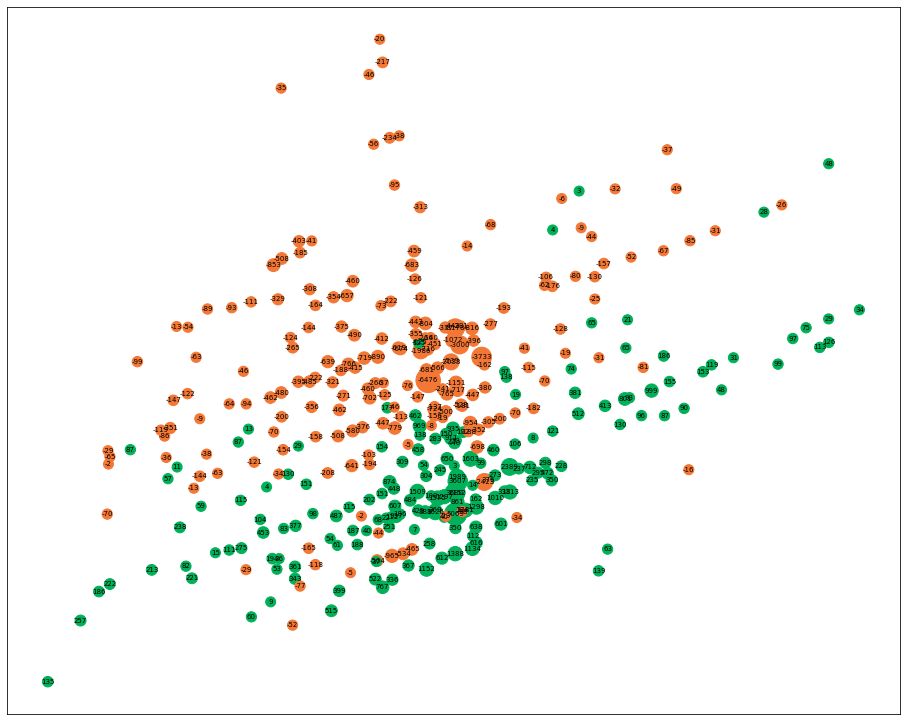

In [41]:
plot_G_stations(g_stations_w,  d_stations_w)

Plot the graphs for stations for weekends in 2018

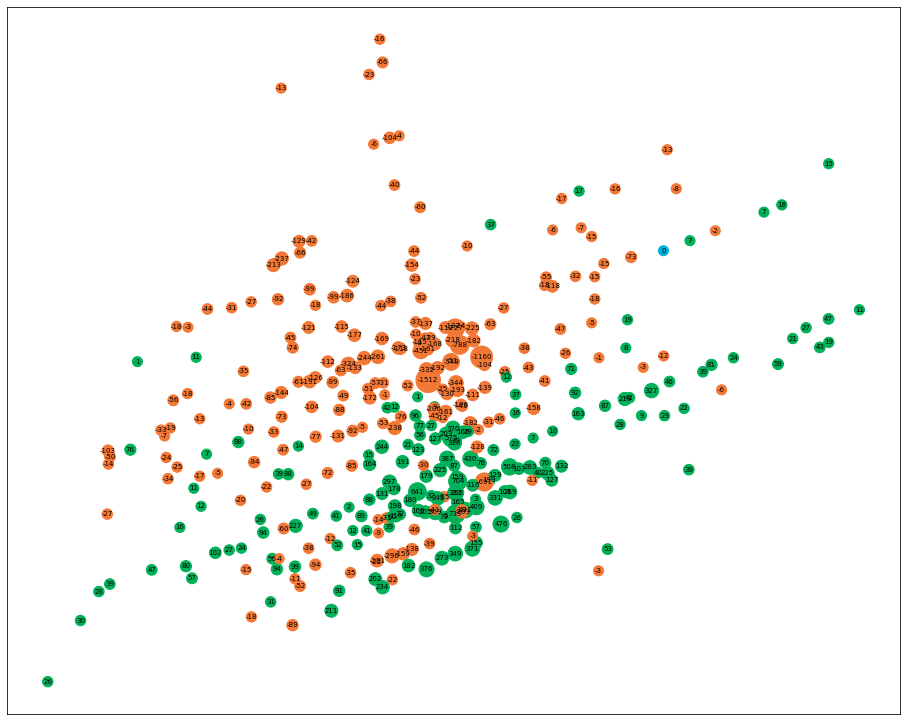

In [42]:
plot_G_stations(g_stations_we,  d_stations_we)

**Plot the graphs for regions**

In [43]:
def plot_G_regions(G,flows,degrees,ptitle=""):
    colors=[]
    pos={}
    max_deg = degrees.abs().max()
    node_sizes=[]
    labels={}
    for e in G:
        d=degrees[e]
        node_sizes.append(100 + 600*(abs(d)/max_deg))
        pos[int(e)]=(centers[e,0],centers[e,1])
        labels[int(e)]=(int(d))
        if d==0:
            colors.append('#00aedb')
        elif d < 0:
            colors.append('#f37735')
        else: 
            colors.append('#00b159')

    color_cut_pos = flows[flows>0].median()
    color_cut_neg = flows[flows<0].median()

    elargepos = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] >color_cut_pos]
    elargeneg = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] < color_cut_neg]
    eother = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] >= color_cut_neg and d['weight'] <= color_cut_pos]

    # nodes
    nx.draw_networkx_nodes(G, pos, node_size=node_sizes,node_color=colors,alpha=0.9)

    # edges
    nx.draw_networkx_edges(G, pos, edgelist=elargepos,edge_color='#00b159', width=4,alpha=0.7)
    nx.draw_networkx_edges(G, pos, edgelist=elargeneg,edge_color='#f37735', width=4,alpha=0.7)
    nx.draw_networkx_edges(G, pos, edgelist=eother,edge_color='#00aedb', width=1,alpha=0.5)

    # labels
    nx.draw_networkx_labels(G, pos, labels= labels,font_size=14)
    plt.title(ptitle)
    plt.show()

Plot the graphs for regions for weekdays in 2018

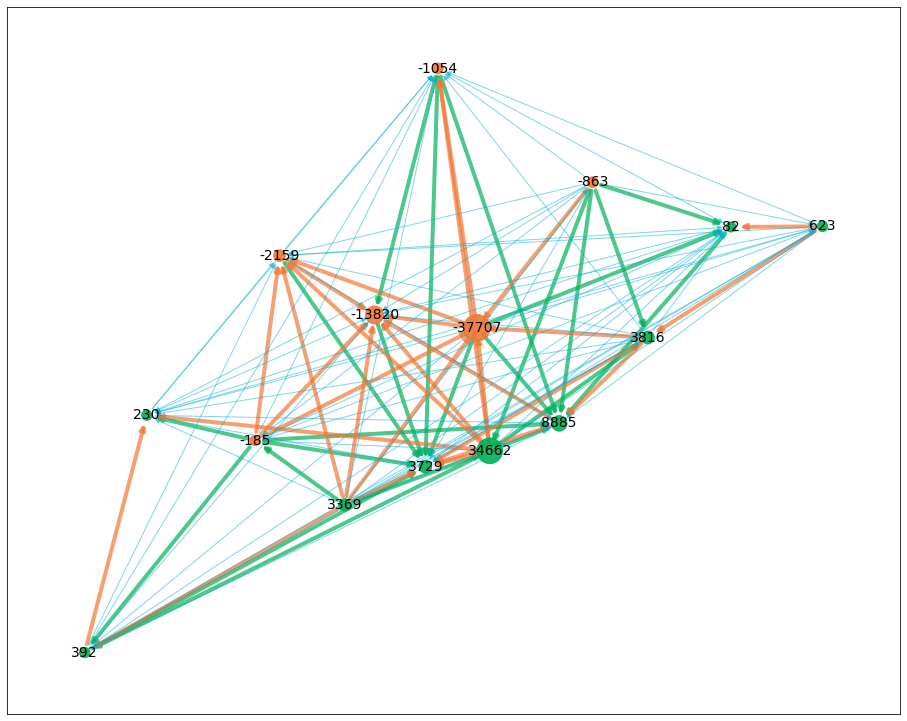

In [44]:
plot_G_regions(g_regions_w,f_regions_w,d_regions_w)

Plot the graphs for regions for weekends in 2018

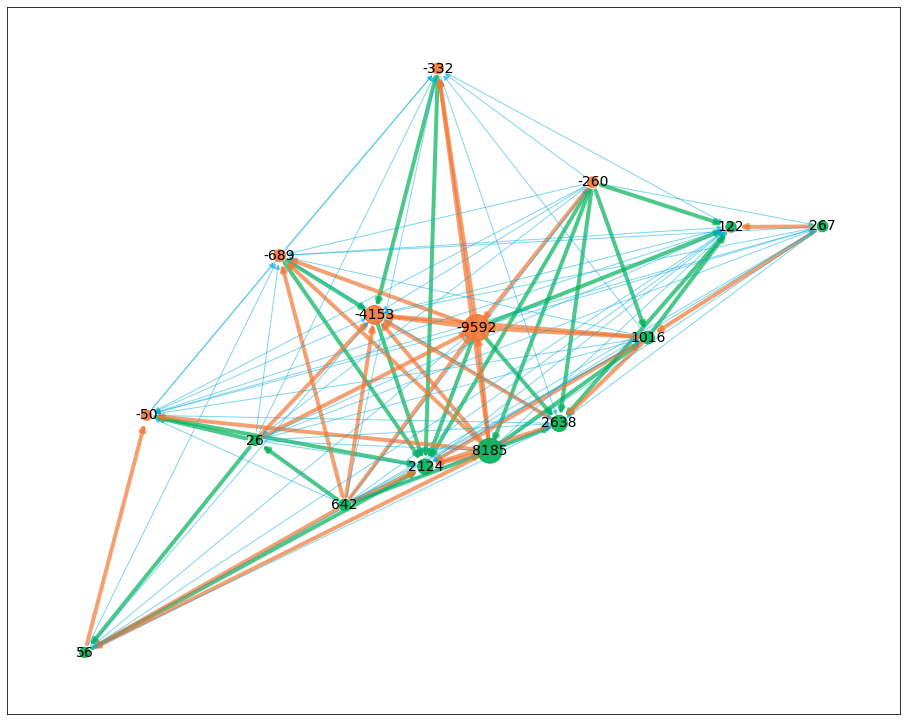

In [45]:
plot_G_regions(g_regions_we,f_regions_we,d_regions_we)

**Flows by day**

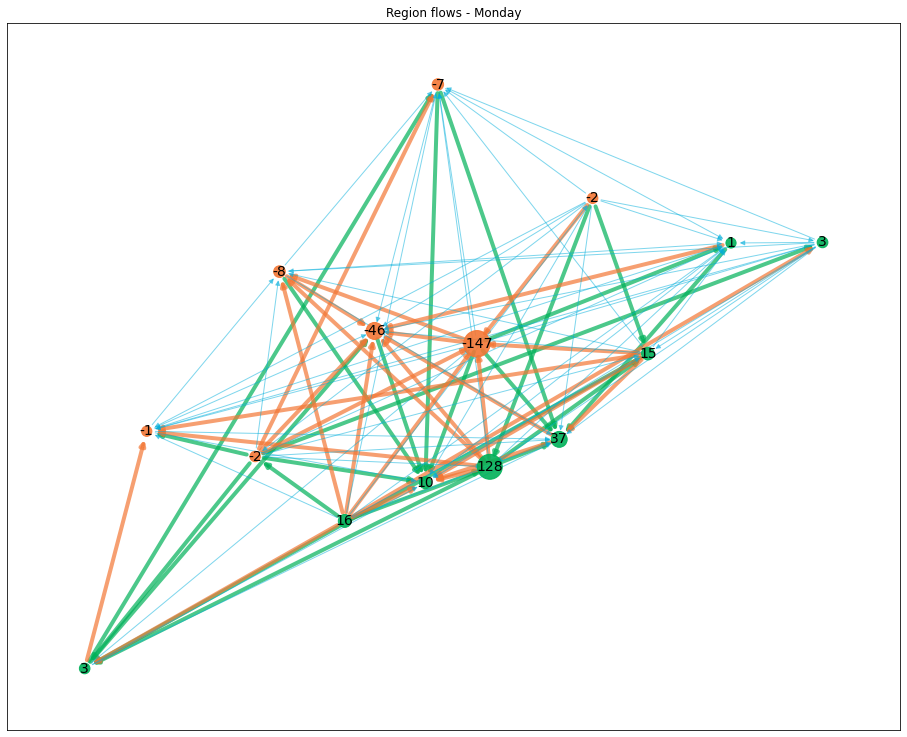

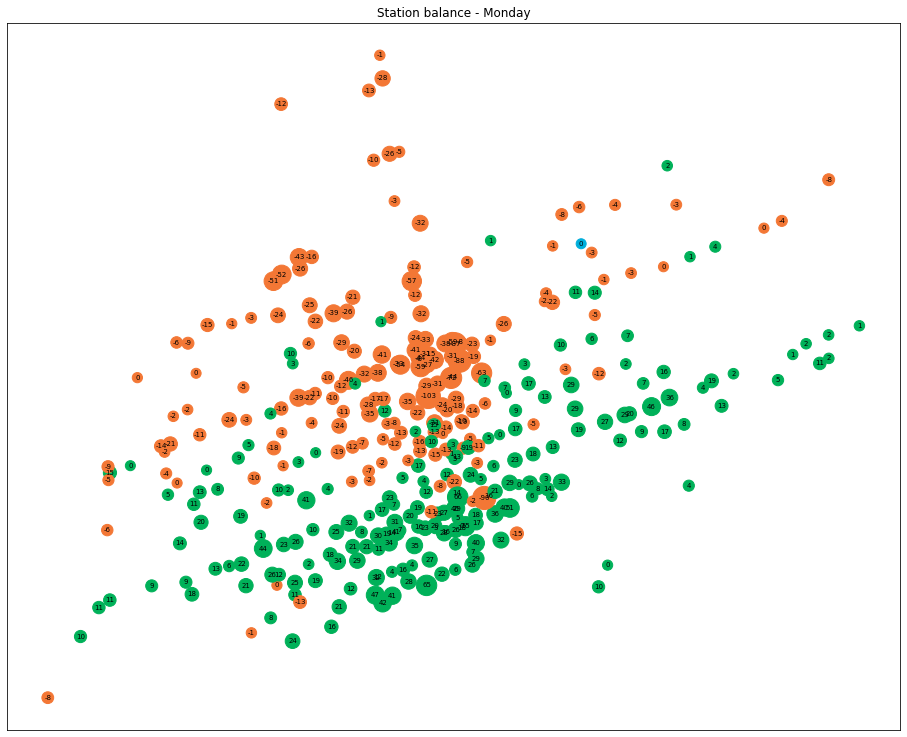

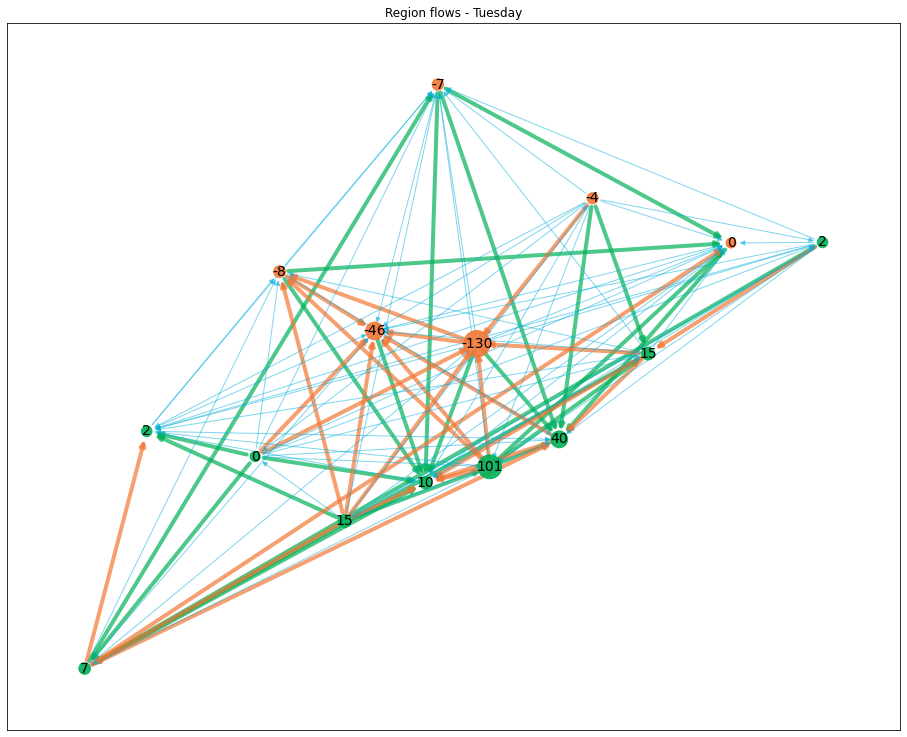

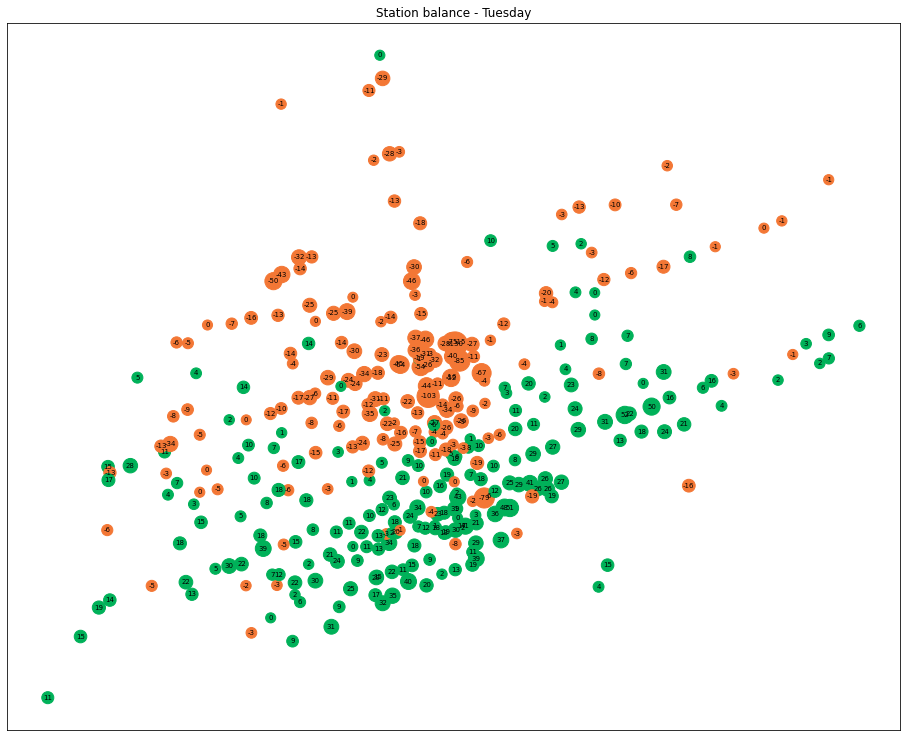

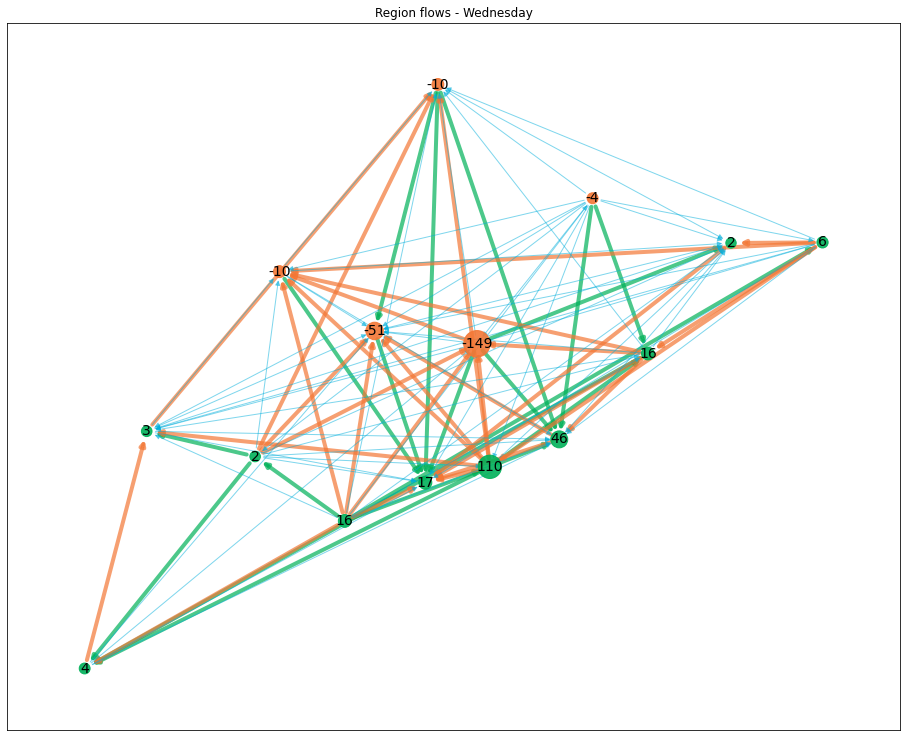

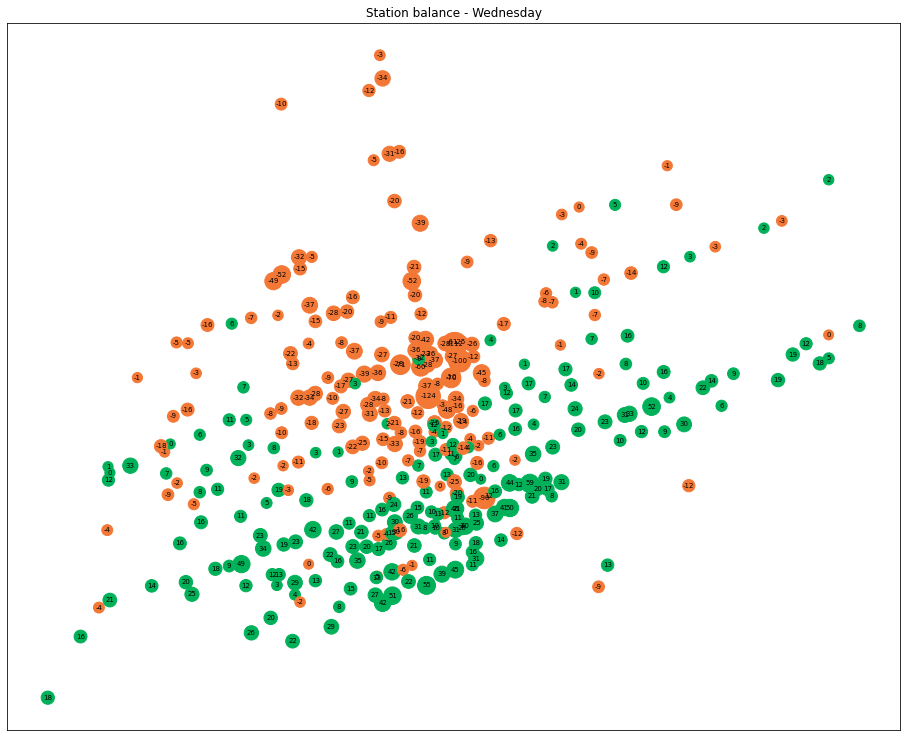

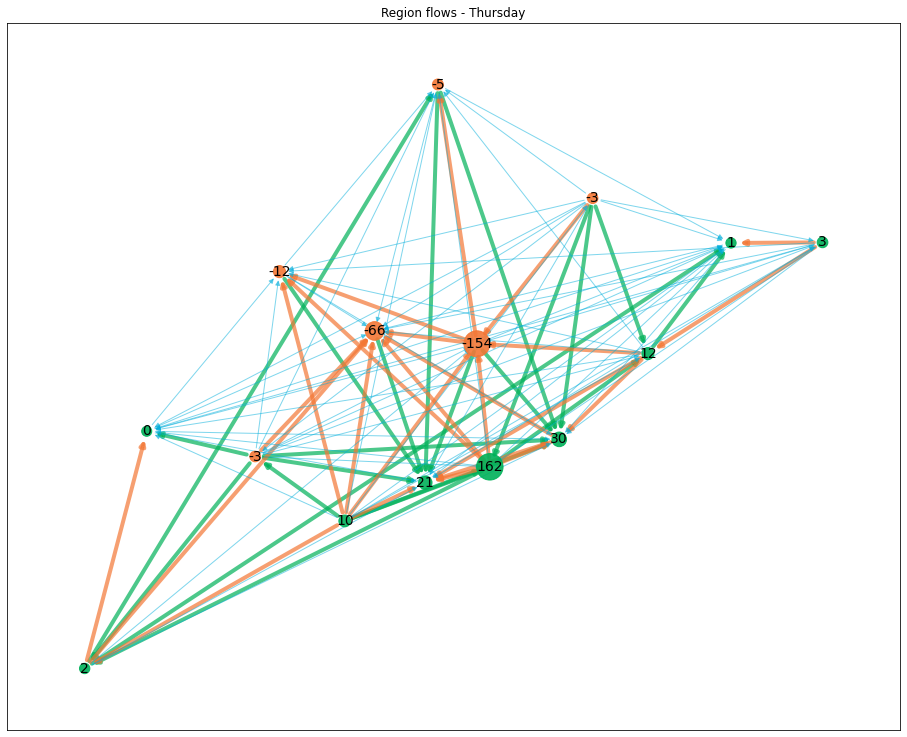

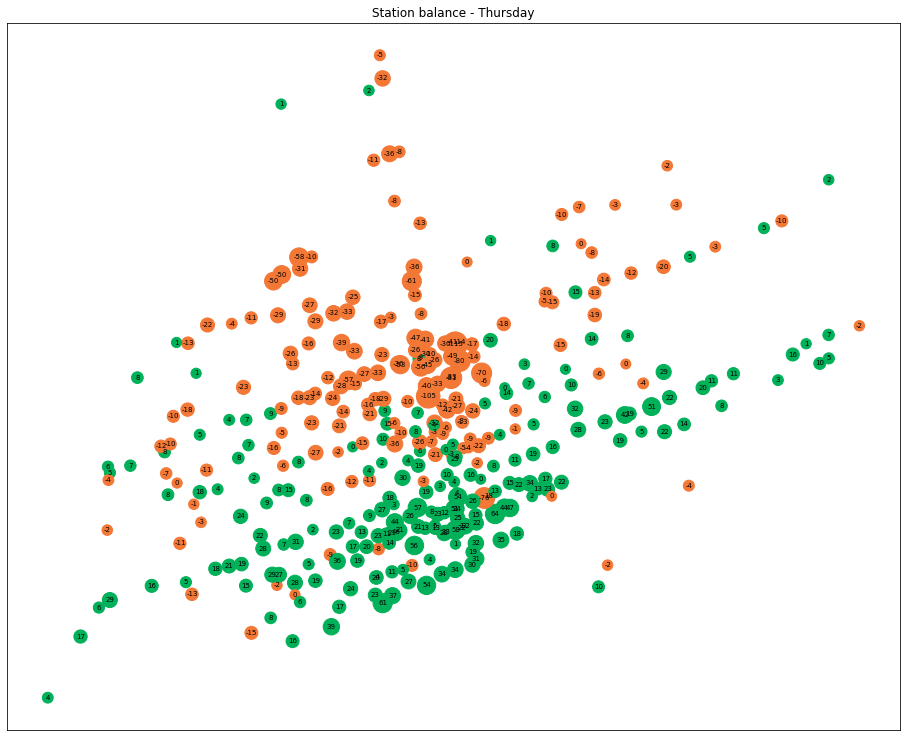

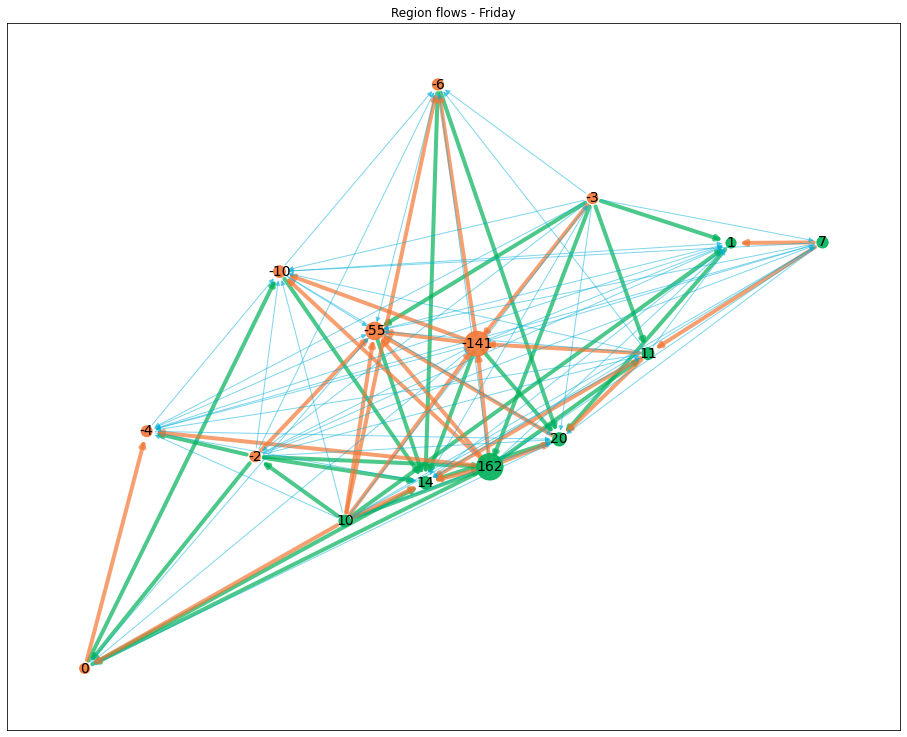

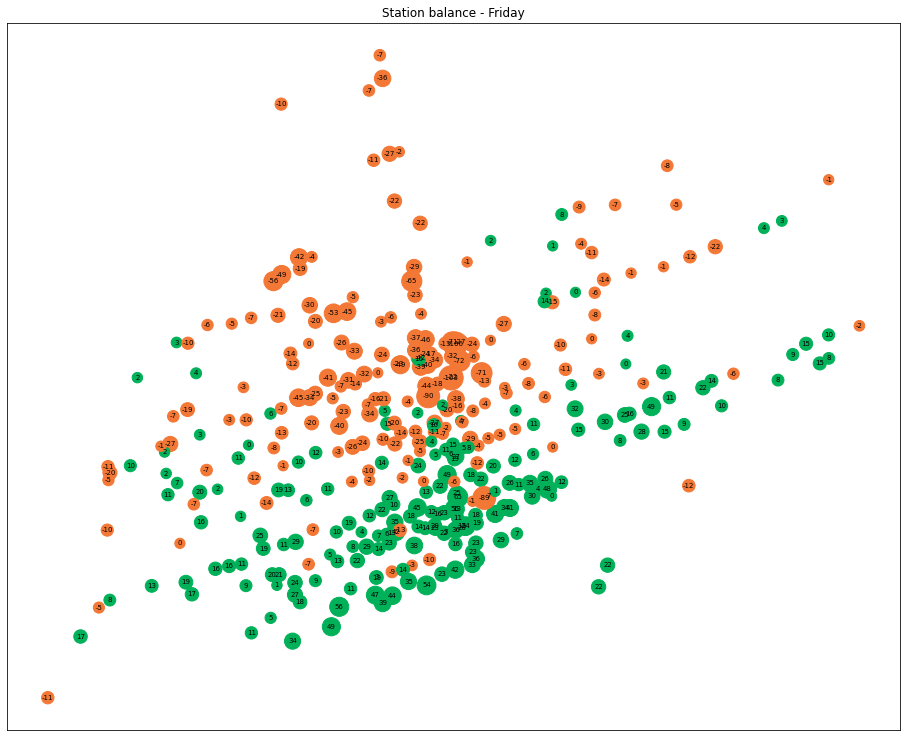

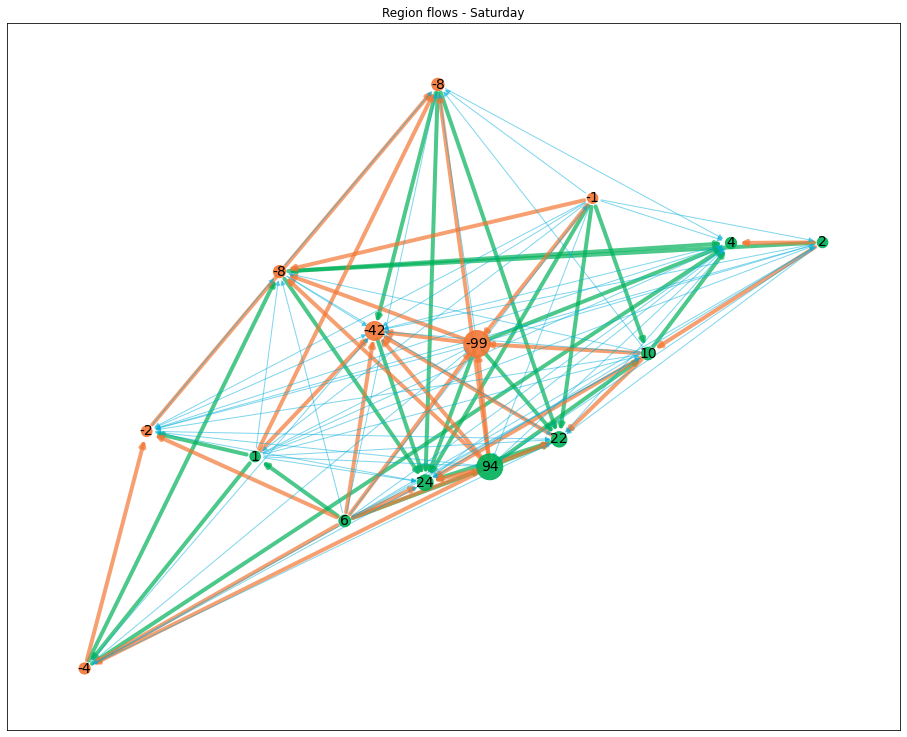

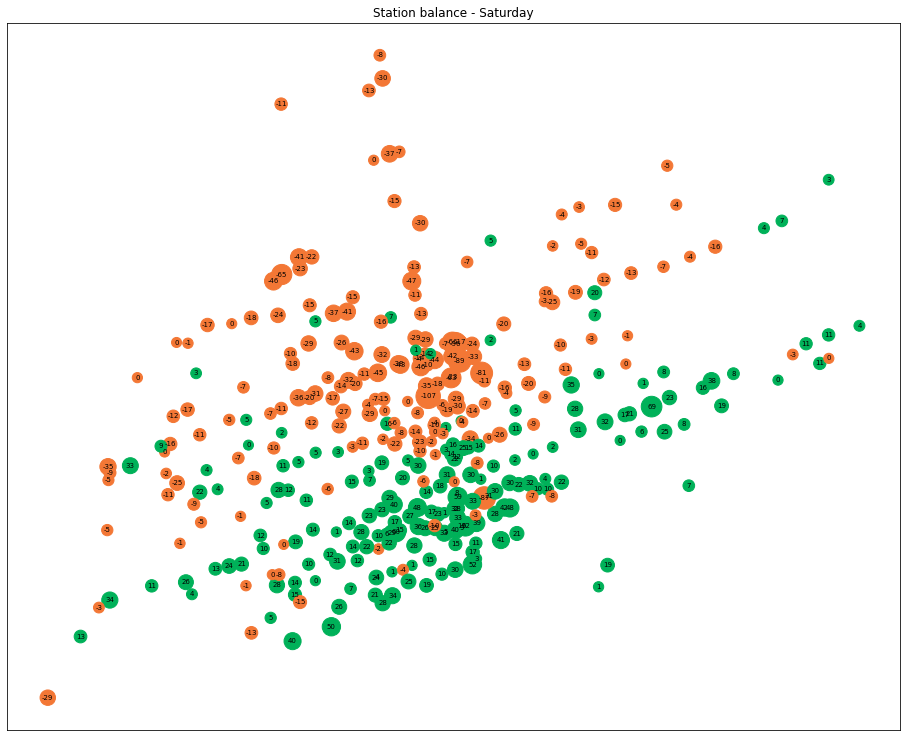

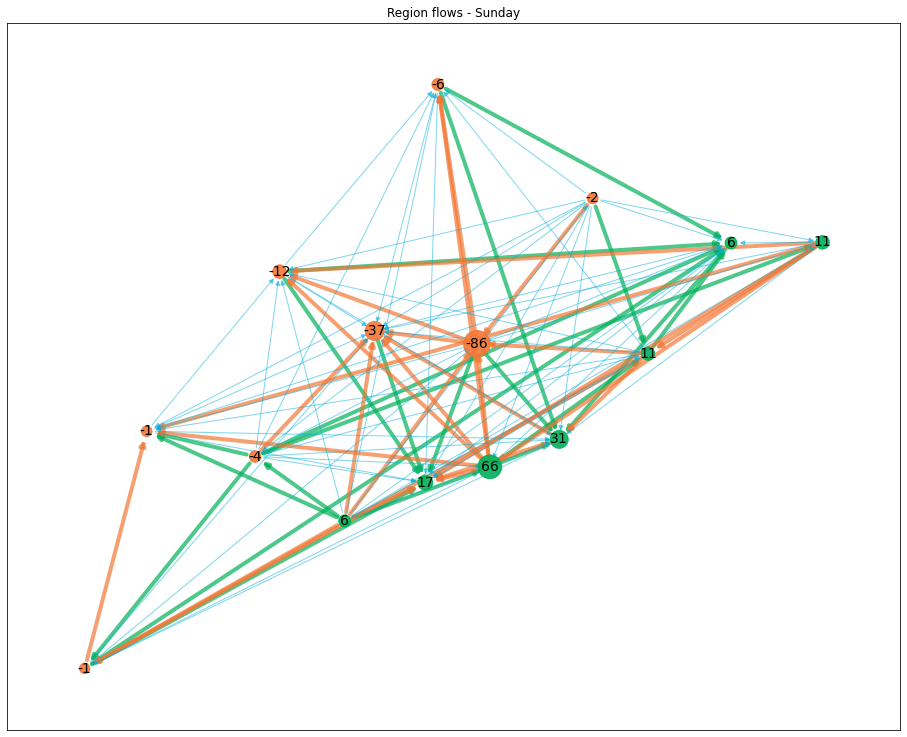

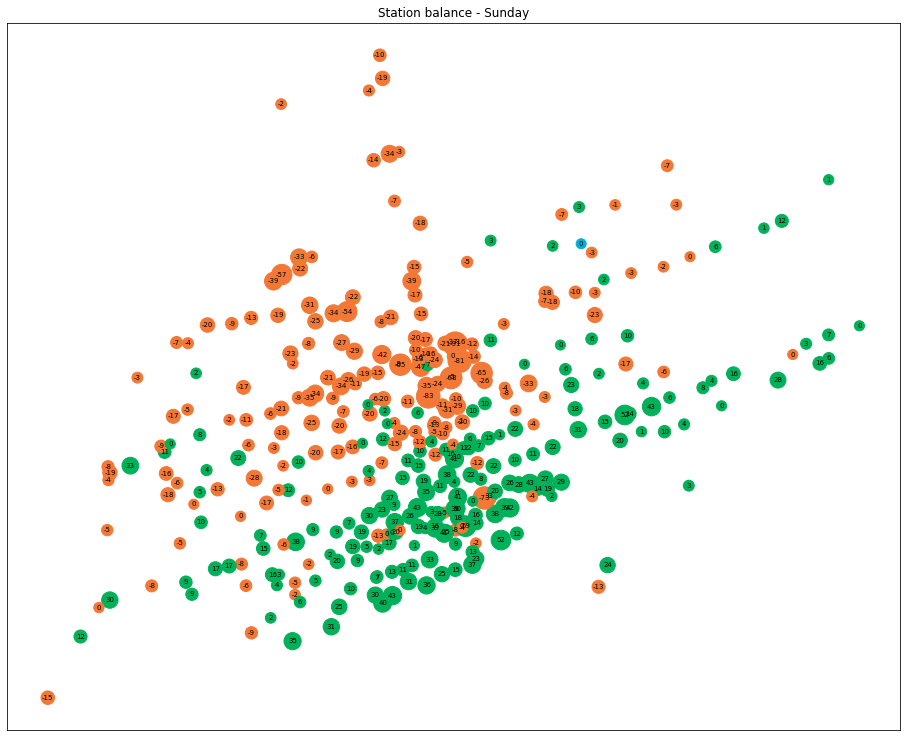

In [46]:
#bikeshare_stations

def getAverageFlowsByDays(region=True,start_date=pd.Timestamp('2018-01-01'),end_date=pd.Timestamp('2019-01-01')):
    
    f_list=[]
    d_list=[]
    g_list=[]
    # flows
    if region:
        flows = bikeshare.loc[(bikeshare['from_station_c']!=bikeshare['to_station_c'])& (bikeshare['date']>=start_date) & (bikeshare['date']<end_date) ].groupby(['region_key','date'],as_index=False)['region_count'].sum()
        flows['dayofweek']=flows['date'].dt.dayofweek
        flows = flows.groupby(['region_key','dayofweek'],as_index=False)['region_count'].mean()
    else:
        flows = bikeshare.loc[(bikeshare['from_station_id']!=bikeshare['to_station_id'])& (bikeshare['date']>=start_date) & (bikeshare['date']<end_date) ].groupby(['station_key','date'],as_index=False)['station_count'].sum()
        flows['dayofweek']=flows['date'].dt.dayofweek
        flows = flows.groupby(['station_key','dayofweek'],as_index=False)['station_count'].mean()
    
    for day in range(0,7):
        f=flows.loc[flows['dayofweek']==day]       
        if region:
            f.index = f['region_key']
            f=f['region_count']
        else:
            f.index = f['station_key']
            f=f['station_count']
        f_list.append(f)
        # graph
        G = nx.DiGraph()
        for index, value in f.items():
            G.add_weighted_edges_from([(int(index.split('_')[0]), int(index.split('_')[1]), value)])
        g_list.append(G)
        # degrees of each nodes
        nodes=[]
        degrees=[]
        for e in G:
            nodes.append(e)
            degrees.append(G.in_degree(e, weight='weight')-G.out_degree(e, weight='weight'))
        deg = pd.Series(data=degrees,index=nodes).sort_values()
        d_list.append(deg)
    return f_list,g_list,d_list

f_stations, g_stations , d_stations = getAverageFlowsByDays(region=False,start_date=pd.Timestamp('2018-01-01'),end_date=pd.Timestamp('2019-01-01'))
f_regions, g_regions , d_regions = getAverageFlowsByDays(region=True,start_date=pd.Timestamp('2018-01-01'),end_date=pd.Timestamp('2019-01-01'))


weekday={0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}

for i in range(0,7):
    plot_G_regions(g_regions[i], f_regions[i] , d_regions[i],"Region flows - {}".format(weekday.get(i)))
    plot_G_stations(g_stations[i],  d_stations[i],"Station balance - {}".format(weekday.get(i)))